# **ELEC-E5431 – Large-Scale Data Analysis (LSD Analysis)**
**Home Work 1**<br>
**Osman Manzoor Ahmed**<br>
**721347**<br>



In every algorithm the output is as following:
1. X Matrix computed by the algorithm
2. X Optimal Matrix
3. Difference of the above mentioned matrices
4. Convergence rate plot
5. Plot of the X optimal and X created by the algorithm

Kindly scroll down to the ends of each algorithm output in order to see the plots.

In [13]:
# All Libraries

import pandas as pd 
from matplotlib import pyplot as plt 
from IPython.display import display, HTML
import numpy as np  
from scipy import random, linalg
from sklearn.datasets import make_spd_matrix
import math
from random import randint

In [33]:
# ********************************* All Functions*******************************

# Gradient  Ax-b
def gradient(A,b,x):
    #gradient = np.subtract(np.dot(np.transpose(A),x),b)
    gradient = np.subtract(np.dot(A,x),b)
    #gradient = np.subtract(b,np.dot(np.transpose(A),x))
    return gradient

# Negative Gradient  b-Ax
def neg_gradient(A,b,x):
    #gradient = np.subtract(np.dot(np.transpose(A),x),b)
    gradient = np.subtract(b,np.dot(np.transpose(A),x))
    return gradient

#Error Function log || x_grad - x_opt ||
def logerror(x_grad, x_opt):
    diff = x_grad - x_opt
    norm = np.linalg.norm(diff)
    log = np.log(norm)
    return log

# Gradient Descent Method
def gradient_descent(A, b, a, k,x_opt):
    #x = np.zeros((100,1))
    n = len(b)
    x = np.zeros((n,1))
    errors = []

    #for i in range(k):
    while True:
        # Calculate gradient
        grad = gradient(A,b,x)
        # Gradient descent formula
        x = x - a * grad
        #print("In")
        if(np.linalg.norm(grad) <= pow(10,-5)):
           break
        #empirical_errors.append(empirical_risk(X,Y,w))
        errors.append(logerror(x,x_opt))
    return errors,x

# Conjugate Gradient Descent Method
def conjugate_gradient_descent(A, b, a, k,x_opt):
    #x = np.zeros((100,1))
    n = len(b)
    x = np.zeros((n,1))
    p = b
    p_prev = np.zeros((n,1))
    errors = []
    checker = 1
    gamma = 0
    grad = np.ones((n,1))
    i = 0
    r = b
    r_new = b
    #for i in range(k):
    while True:
        # Calculate gradient
        i = i+1
        if(i == 1):
            p = r
            p_prev = p
        else:
            beta = np.divide(np.power(np.linalg.norm(r_new),2),np.power(np.linalg.norm(r),2))
            p = np.add(r_new,np.dot(beta,p_prev))
            p_prev = p
 
        # conjugate Gradient formula
        x = x + a * p
        r = r_new
        r_new = neg_gradient(A,b,x)
        if(np.linalg.norm(r_new) <= pow(10,-5)):
           break
        # Calculate the gamma now
        #print("In")
        errors.append(logerror(x,x_opt))
    return errors,x

# Nesterov’s Algorithm
def nesterov_algorithm(A, b, a, L, k,x_opt):
    #x = np.zeros((100,1))
    n = len(b)
    x = np.zeros((n,1))
    errors = []
    y = x
    alpha = a
    
    #for i in range(k):
    while True:
        # Calculate gradient
        x_prev = x
        grad = gradient(A,b,y)
        x = (np.subtract(y,(1/L)*grad))
        a_prev = alpha
        alpha = (1 + math.sqrt(1 + 4 * a_prev * a_prev))/2
        
        beta = (a_prev * (1-a_prev)) / (a_prev * a_prev + alpha)
             
        y = x + (beta * (np.subtract(x,x_prev)))
        
        if(np.linalg.norm(grad) <= pow(10,-5)):
           break
        # Calculate the gamma now
        #print("In")
        errors.append(logerror(x,x_opt))
    return errors,x

# Stochastic Coordinate Descent Method
def stochastic_coordinate_descent(A, b, a, k,x_opt):
    #x = np.zeros((100,1))
    n = len(b)
    x = np.zeros((n,1))
    errors = []

    for i in range(k):
    #while True:
        #for j in range(len(x)):
        random = randint(0, n-1)
        # Calculate gradient
            
        grad = gradient(A[random,random].reshape(1,1),b[random].reshape(1,1),x[random].reshape(1,1))
        #print(grad.shape)
        # Gradient descent formula
        x[random] = x[random] - a * grad
        #print("In")
        if(np.linalg.norm(grad) <= pow(10,-5)):
           break
        #empirical_errors.append(empirical_risk(X,Y,w))
        errors.append(logerror(x,x_opt))
    return errors




In [15]:
# Creation of Matrices A, b and X_opt(Optimal x)

# Generate a random symmetric, positive-definite matrix. Size 100*100 
matrixSize = 100
A = make_spd_matrix(matrixSize, random_state=None)

# Check if the newly created matrix A is positive- definite. Check if all its Eignevalues are positive
if(np.all(np.linalg.eigvals(A) > 0)):
    print("Success, you have a positive definite matrix")
    
# Generate matrix b size 100*1 that should be in range of Matrix A
x = np.ptp(A,axis = 0)
b = np.reshape(x, (100,1))

# Generate X_Opt as X_opt = A(inverse)b
A_inverse = np.linalg.inv(A)
X_opt = np.dot(A_inverse,b)

#Calculate value of alpha as 1/trace(A)
alpha = 1/A.trace()


Success, you have a positive definite matrix


******************************************************
X Matrix computed by the gradient descent
[[ 369.85567513]
 [ 347.52930768]
 [ 136.57170757]
 [ 356.56884788]
 [ 182.62946928]
 [ 324.9442824 ]
 [ 336.91040735]
 [ 146.8814646 ]
 [ 149.54641457]
 [ 265.2008635 ]
 [ 296.30396844]
 [ 196.94285936]
 [ 238.76143669]
 [ 245.74076526]
 [ 260.33718727]
 [ 149.88885633]
 [ 251.66869172]
 [ 252.97598286]
 [ 165.60318685]
 [ 201.12797511]
 [ 359.22615672]
 [ 233.59337221]
 [ 298.68877415]
 [ 263.51816722]
 [ 304.47635469]
 [ 128.762478  ]
 [ 400.0650543 ]
 [ 251.4819183 ]
 [ 315.40094681]
 [ 258.33566112]
 [ 248.87602114]
 [ 229.45760242]
 [ 254.82573674]
 [ 182.66535639]
 [ 286.18313018]
 [ 220.62734832]
 [ 155.46716268]
 [ 263.00827141]
 [ 416.08642763]
 [ 393.30587325]
 [ 179.49759759]
 [ 191.3877822 ]
 [ 208.3530741 ]
 [ 294.35507129]
 [ 205.79417736]
 [ 119.27445813]
 [ 140.07654337]
 [ 260.29020516]
 [ 232.48418375]
 [ 290.12131115]
 [ 272.84196638]
 [ 331.71504429]
 [ 118.21582202]
 [

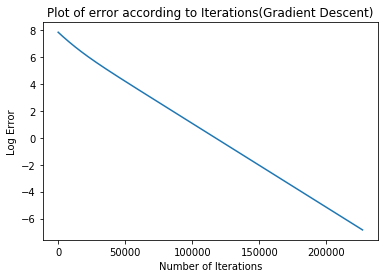

Text(0.5,1,'X Created by Gradient Descent')

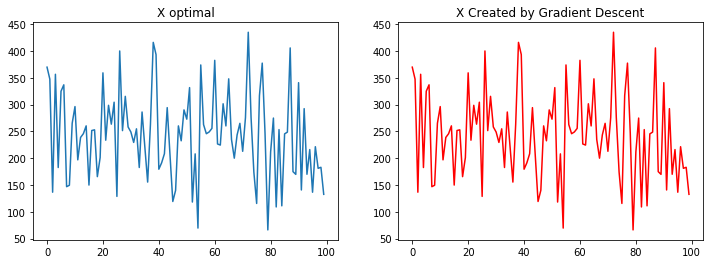

In [22]:

# **************************** Gradient Descent *******************

loggError, x_grad_hat = gradient_descent(A,b,alpha,1000,X_opt)
print("******************************************************")
print("X Matrix computed by the gradient descent")
print(x_grad_hat)
print("******************************************************")
print("X Optimal ")
print(X_opt)
print("******************************************************")
diff_gradient_descent = np.subtract(x_grad_hat,X_opt)
print("Gradient Descent, Difference between x and x_optimal")
print(diff_gradient_descent)

plt.plot(loggError)
plt.xlabel('Number of Iterations')
plt.ylabel('Log Error')
plt.title('Plot of error according to Iterations(Gradient Descent)')
plt.show()

fig, axes = plt.subplots(1, 2,figsize=(12, 4))
axes[0].plot(X_opt)
axes[0].set_title("X optimal")
axes[1].plot(x_grad_hat,color="red")
axes[1].set_title("X Created by Gradient Descent")

******************************************************
X Matrix computed by the conjugate gradient descent
[[ 369.8557663 ]
 [ 347.5293881 ]
 [ 136.57171832]
 [ 356.56893369]
 [ 182.6294939 ]
 [ 324.94436463]
 [ 336.91047443]
 [ 146.88149111]
 [ 149.54643371]
 [ 265.20092065]
 [ 296.30404067]
 [ 196.94288516]
 [ 238.76149388]
 [ 245.74081314]
 [ 260.33723697]
 [ 149.88887617]
 [ 251.66872988]
 [ 252.97603756]
 [ 165.60321468]
 [ 201.12800814]
 [ 359.22625092]
 [ 233.59342716]
 [ 298.68884118]
 [ 263.51821643]
 [ 304.47641876]
 [ 128.7624859 ]
 [ 400.0651427 ]
 [ 251.48197567]
 [ 315.40101215]
 [ 258.33572562]
 [ 248.87607518]
 [ 229.45765191]
 [ 254.82579783]
 [ 182.66537858]
 [ 286.18318651]
 [ 220.62738647]
 [ 155.46718181]
 [ 263.00832238]
 [ 416.08652611]
 [ 393.30596519]
 [ 179.49762724]
 [ 191.3878051 ]
 [ 208.35310981]
 [ 294.3551371 ]
 [ 205.79420876]
 [ 119.27447747]
 [ 140.07655498]
 [ 260.29025494]
 [ 232.4842334 ]
 [ 290.12138266]
 [ 272.84201922]
 [ 331.71512619]
 [ 118.21

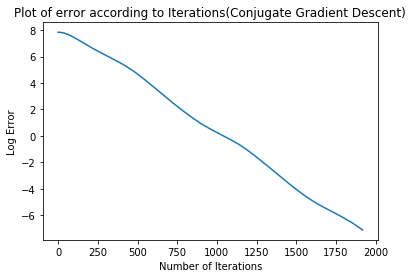

Text(0.5,1,'X Created by Conjugate Gradient Descent')

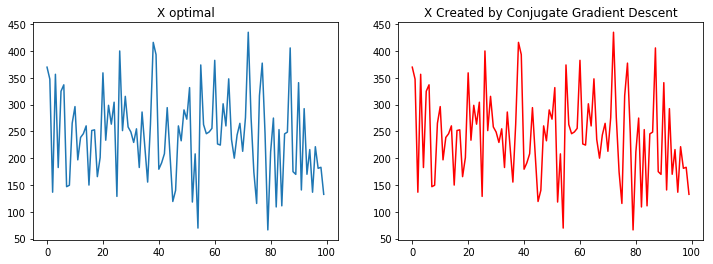

In [21]:
#***************************** Conjugate Gradient Descent ************

logeError,x_conj_grad_hat = conjugate_gradient_descent(A,b,alpha,10000,X_opt)
print("******************************************************")
print("X Matrix computed by the conjugate gradient descent")
print(x_conj_grad_hat)
print("******************************************************")
print("X Optimal ")
print(X_opt)
print("******************************************************")
diff_conj_gradient_descent = np.subtract(x_conj_grad_hat,X_opt)
print("Conjugate Gradient Descent, Difference between x and x_optimal")
print(diff_conj_gradient_descent)

plt.plot(logeError)
plt.xlabel('Number of Iterations')
plt.ylabel('Log Error')
plt.title('Plot of error according to Iterations(Conjugate Gradient Descent)')
plt.show()


fig, axes = plt.subplots(1, 2,figsize=(12, 4))
axes[0].plot(X_opt)
axes[0].set_title("X optimal")
axes[1].plot(x_conj_grad_hat,color="red")
axes[1].set_title("X Created by Conjugate Gradient Descent")


******************************************************
X Matrix computed by the Nesterov Algorithm
[[ 369.85567513]
 [ 347.52930769]
 [ 136.57170756]
 [ 356.56884789]
 [ 182.62946928]
 [ 324.9442824 ]
 [ 336.91040735]
 [ 146.8814646 ]
 [ 149.54641457]
 [ 265.2008635 ]
 [ 296.30396844]
 [ 196.94285936]
 [ 238.76143669]
 [ 245.74076526]
 [ 260.33718727]
 [ 149.88885633]
 [ 251.66869172]
 [ 252.97598287]
 [ 165.60318685]
 [ 201.12797511]
 [ 359.22615673]
 [ 233.59337221]
 [ 298.68877416]
 [ 263.51816722]
 [ 304.4763547 ]
 [ 128.762478  ]
 [ 400.06505431]
 [ 251.4819183 ]
 [ 315.40094682]
 [ 258.33566112]
 [ 248.87602114]
 [ 229.45760242]
 [ 254.82573674]
 [ 182.66535639]
 [ 286.18313018]
 [ 220.62734832]
 [ 155.46716268]
 [ 263.00827141]
 [ 416.08642763]
 [ 393.30587325]
 [ 179.49759758]
 [ 191.3877822 ]
 [ 208.3530741 ]
 [ 294.35507129]
 [ 205.79417736]
 [ 119.27445812]
 [ 140.07654337]
 [ 260.29020516]
 [ 232.48418375]
 [ 290.12131115]
 [ 272.84196638]
 [ 331.71504429]
 [ 118.21582201]


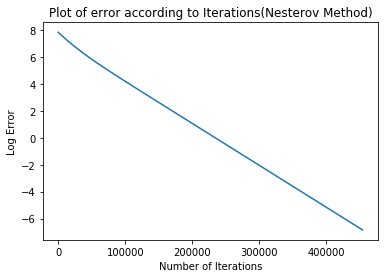

Text(0.5,1,'X Created by Nesterov Algorithm')

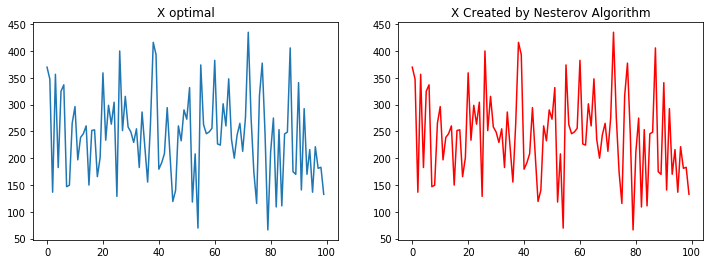

In [28]:
#***************************** Nesterov’s Algorithm ************

logError,x_nest_algo = nesterov_algorithm(A,b,0,A.trace(),10000,X_opt)
print("******************************************************")
print("X Matrix computed by the Nesterov Algorithm")
print(x_nest_algo)
print("******************************************************")
print("X Optimal ")
print(X_opt)
print("******************************************************")
diff_nest_algo = np.subtract(x_nest_algo,X_opt)
print("Nesterov Algorithm, Difference between x and x_optimal")
print(diff_nest_algo)

plt.plot(logError)
plt.xlabel('Number of Iterations')
plt.ylabel('Log Error')
plt.title('Plot of error according to Iterations(Nesterov Method)')
plt.show()

fig, axes = plt.subplots(1, 2,figsize=(12, 4))
axes[0].plot(X_opt)
axes[0].set_title("X optimal")
axes[1].plot(x_nest_algo,color="red")
axes[1].set_title("X Created by Nesterov Algorithm")

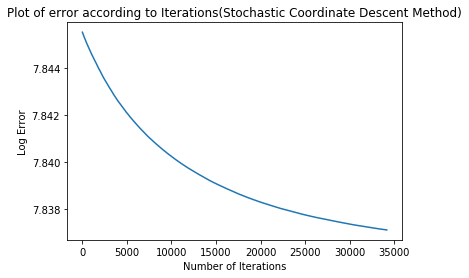

In [34]:
#***************************** Stochastic Coordinate Descent Algorithm ************

logcoorError = stochastic_coordinate_descent(A,b,alpha,50000,X_opt)
#print(len(logError))
#print("Gradient X")
#print(x_grad)
#print(x_grad.shape)

plt.plot(logcoorError)
plt.xlabel('Number of Iterations')
plt.ylabel('Log Error')
plt.title('Plot of error according to Iterations(Stochastic Coordinate Descent Method)')
plt.show()
